In [ ]:
!pip install python_louvain


In [ ]:
import pandas as pd
import networkx as nx
from community import community_louvain


In [ ]:
your_path = r"/diabetes.csv"
data = pd.read_csv(your_path)
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
import pandas as pd
import networkx as nx

G = nx.Graph()
for i, row in data.iterrows():
    Glucose = row['Glucose']
    BMI = row['BMI']
    Insulin = row['Insulin']

    if isinstance(Glucose, float) and pd.isna(Glucose):
        continue

    if isinstance(BMI, float) and pd.isna(BMI):
        continue

    if isinstance(Insulin, float) and pd.isna(Insulin):
        continue

    G.add_edge(Glucose, BMI, weight=Insulin)


In [ ]:
partition = community_louvain.best_partition(G)


In [ ]:
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)


In [ ]:
import matplotlib.pyplot as plt


Community 8: [148.0, 25.6, 37.6, 100.0, 99.0, 29.0, 36.6, 39.4, 106.0, 71.0, 46.8, 24.6, 20.4, 87.0, 179.0, 32.7, 30.9, 37.8, 23.6, 191.0, 167.0, 19.3, 157.0, 26.9, 38.6, 19.5, 23.4]
Community 1: [33.6, 107.0, 123.0, 47.9, 52.3, 22.9, 165.0, 42.1, 57.3]
Community 2: [85.0, 137.0, 43.1, 35.3, 88.0, 24.8, 74.0, 55.0, 104.0, 29.9, 27.8, 169.0]
Community 3: [26.6, 34.0, 150.0, 34.7, 155.0, 38.7, 98.0, 35.2]
Community 4: [183.0]
Community 5: [23.3]
Community 6: [89.0, 28.1, 24.7, 142.0, 96.0, 21.1, 30.4, 28.8]
Community 7: [116.0, 115.0, 34.6, 138.0, 114.0, 23.8, 44.2, 177.0, 36.1, 38.1, 26.3]
Community 9: [78.0, 31.0, 125.0, 0.0, 168.0, 30.0, 118.0, 45.8, 31.1, 38.2, 171.0, 45.4, 146.0, 28.0, 105.0, 176.0, 33.7, 41.5, 84.0, 28.9, 79.0, 33.3, 26.8, 36.9, 39.5, 152.0, 31.9, 43.5, 24.3, 77.0, 94.0]
Community 10: [197.0, 30.5, 110.0, 133.0, 40.5, 32.8, 29.3, 32.4, 160.0, 128.0, 154.0, 28.4, 36.7, 31.3, 149.0]
Community 13: [38.0, 29.6, 126.0, 39.3, 35.4, 32.9, 27.4, 101.0, 24.2, 43.4, 38.5, 93

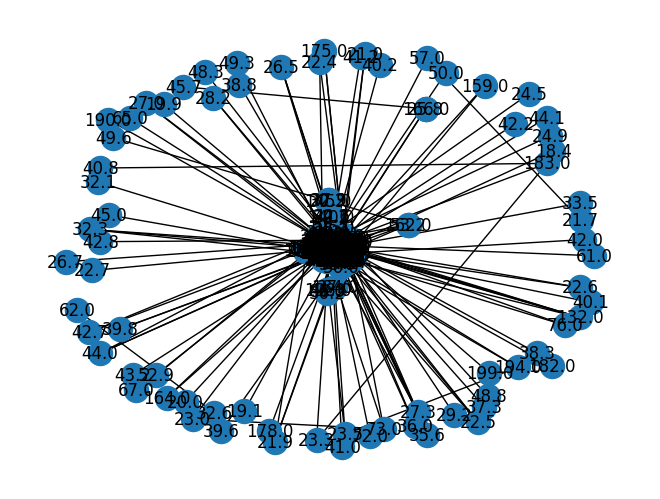

In [ ]:
for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

nx.draw(G, with_labels=True)
plt.show()
